Exercicis d'algoritmes de Classificació.

- Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.



- Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.



- Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.



- Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.



- Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


names =(['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])


data = pd.read_csv('winedata.txt', names = names)
df = pd.DataFrame(data)
df.head()



,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


In [4]:
# Los vinos estan classificados por grupos que constan en el índice 

y = df.index

y.value_counts()


2    71
1    59
3    48
dtype: int64

In [5]:
x = df

In [6]:
# Queremos ver si existen outliers

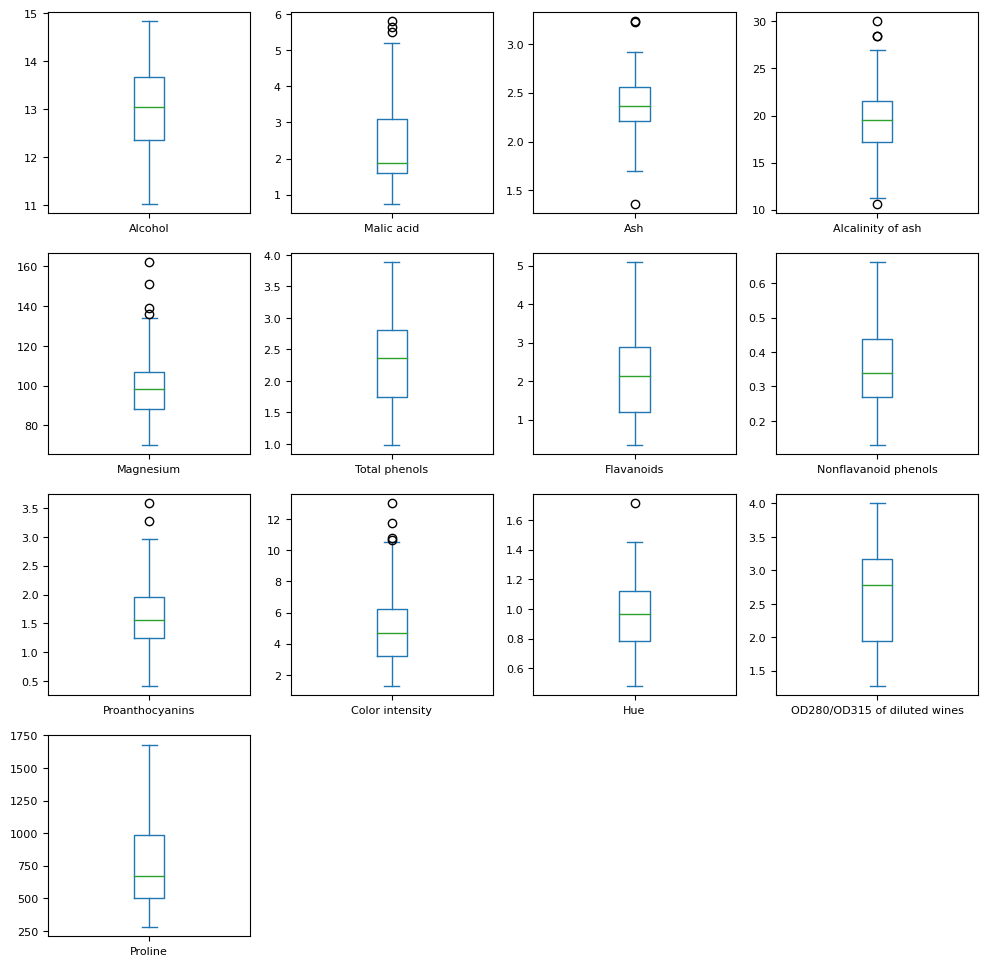

In [7]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

Vemos Outliers para gran parte de las variables, veamos la naturaleza para aplicar RobustScaler cuando sea posible.

In [8]:
#Añadimos target para poder sacar la Matriz de  corr
dfcorr = df.copy()
dfcorr['Target'] = y

In [9]:
corr =  dfcorr.corr()

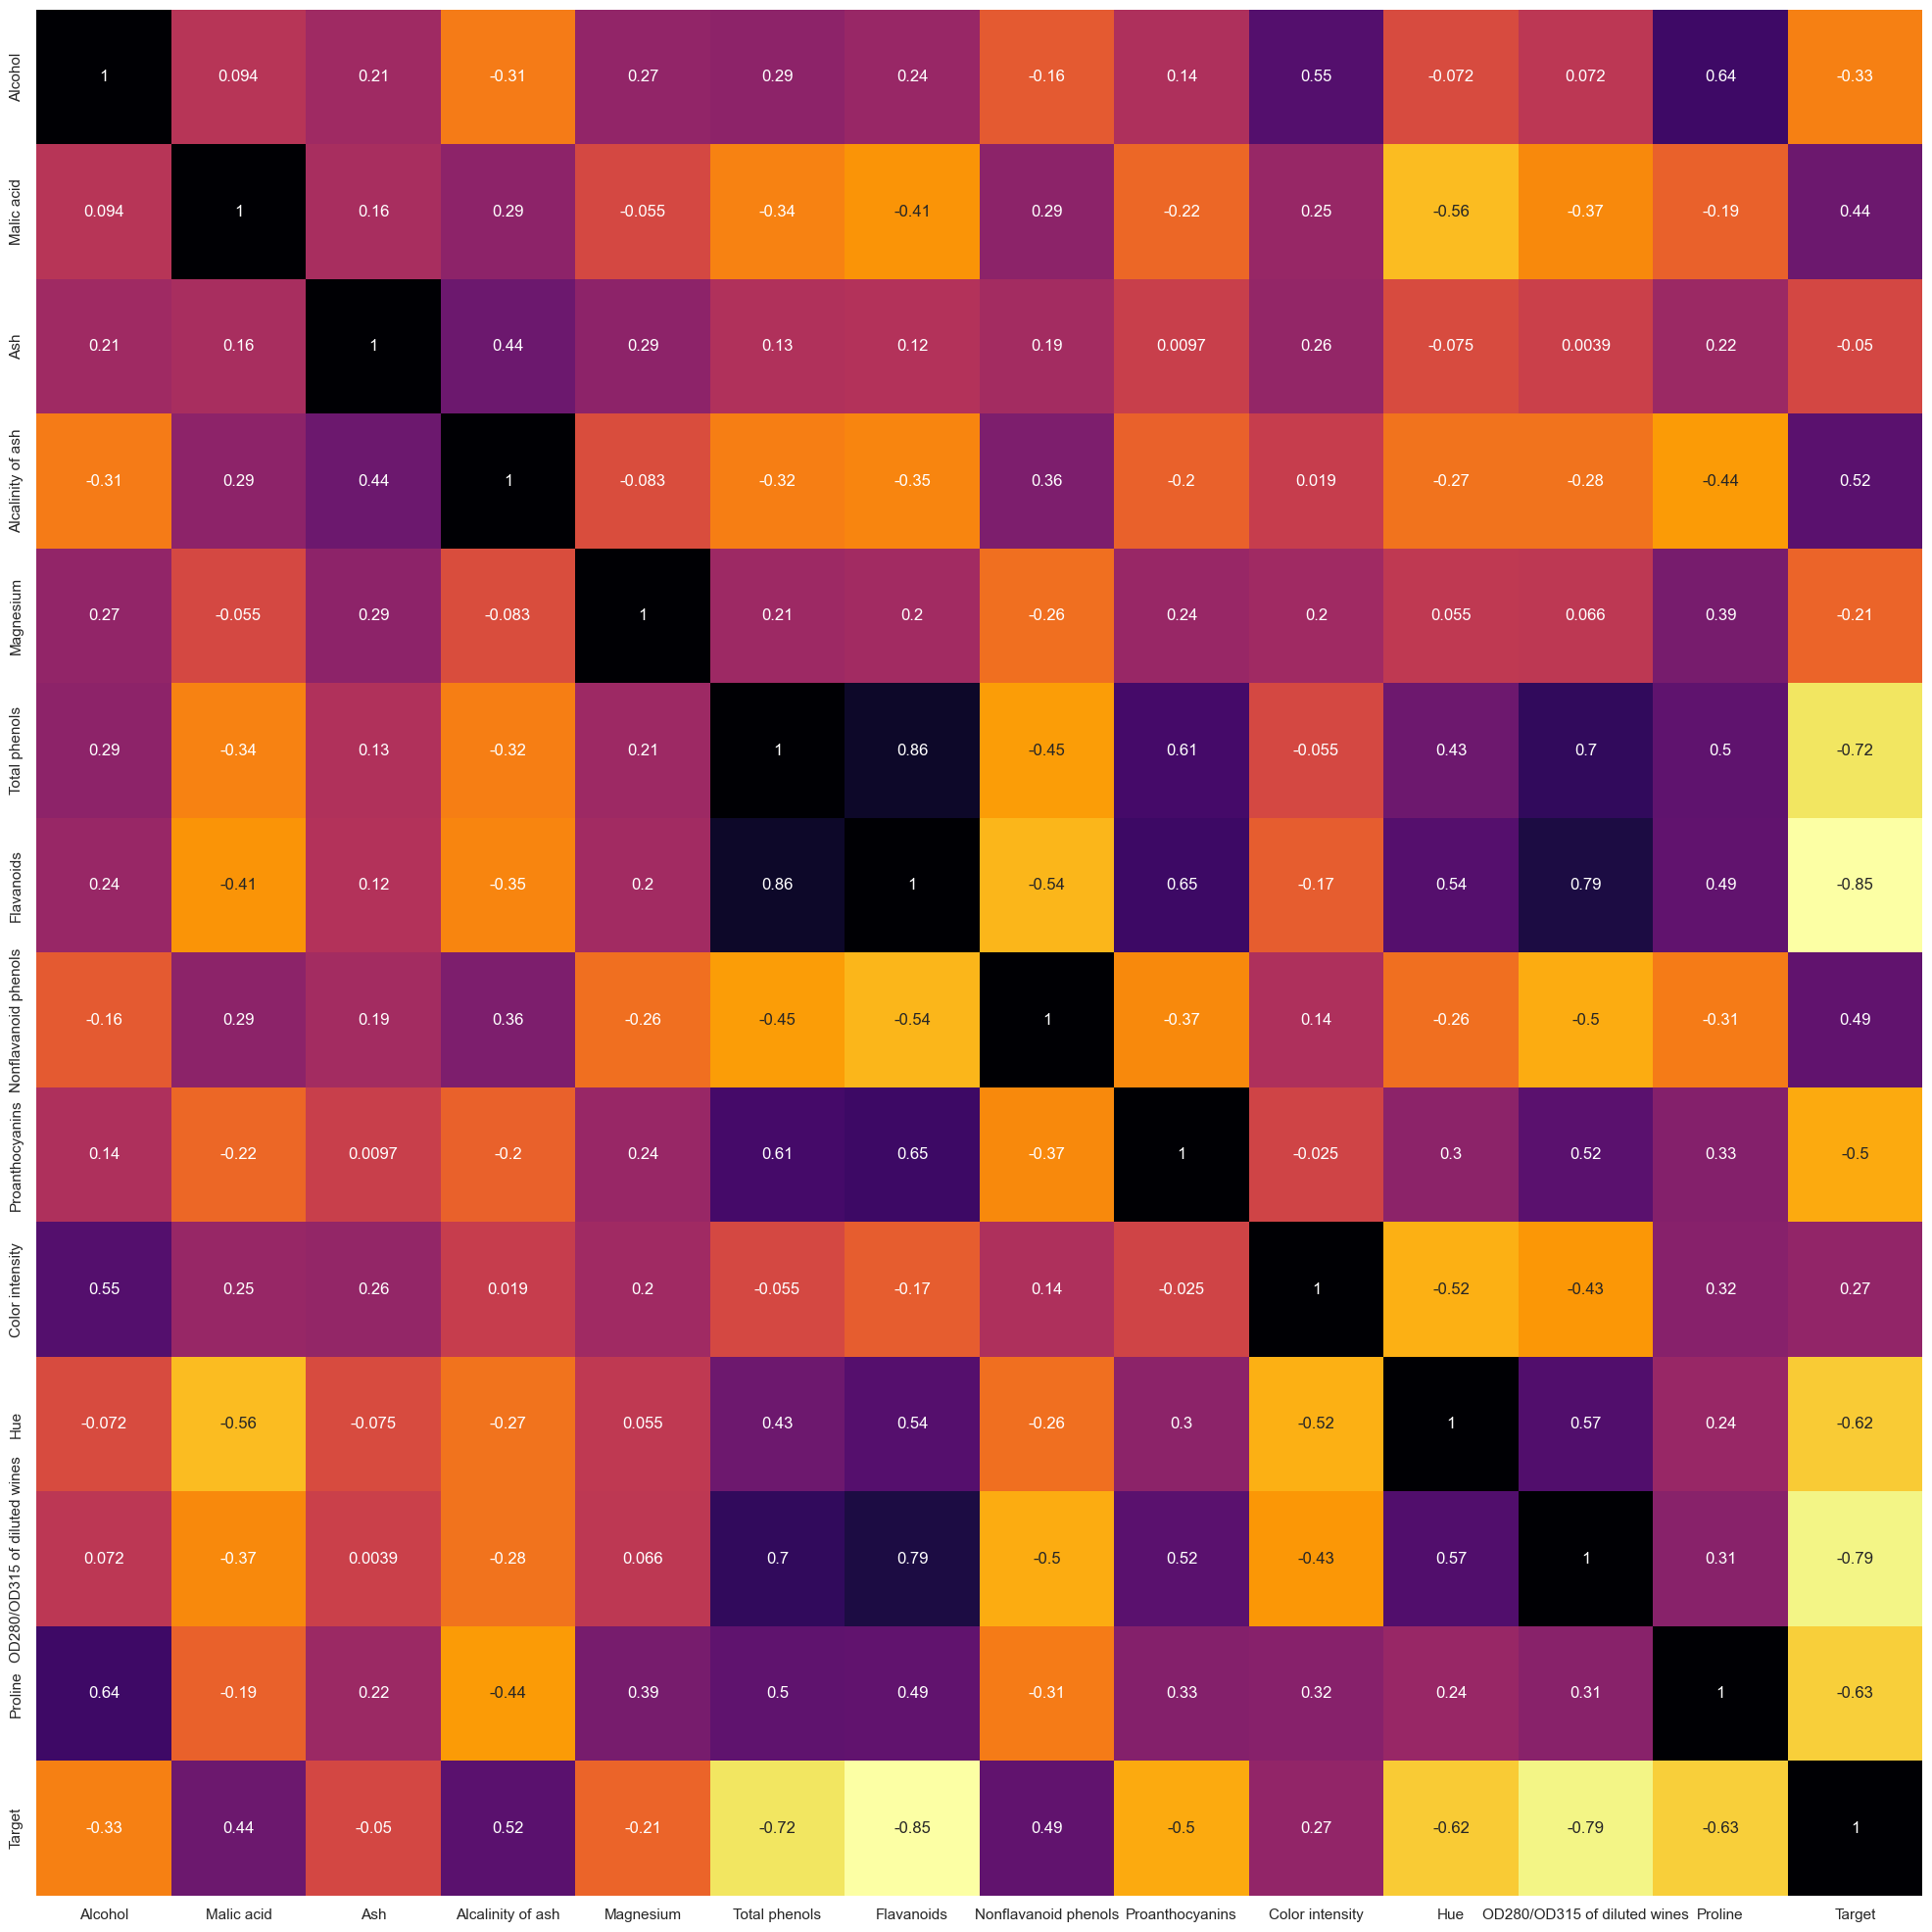

In [53]:
sns.heatmap(corr, cbar = False, annot = True, square= True, color = 'green',cmap = 'inferno_r')
sns.set(rc={"figure.figsize": (25, 25)})


In [11]:
# Comprobamos si las variables son gaussianas o no, para ver si usamos RobustScaler

from scipy.stats import shapiro

columns = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

for i in columns:
    data = df[i]       
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(i+  '  Probablemente gaussiana')
    else:
        print(i+ '   Probablemente no gaussiana')


stat=0.982, p=0.020
Alcohol   Probablemente no gaussiana
stat=0.889, p=0.000
Malic acid   Probablemente no gaussiana
stat=0.984, p=0.039
Ash   Probablemente no gaussiana
stat=0.990, p=0.264
Alcalinity of ash  Probablemente gaussiana
stat=0.938, p=0.000
Magnesium   Probablemente no gaussiana
stat=0.977, p=0.004
Total phenols   Probablemente no gaussiana
stat=0.955, p=0.000
Flavanoids   Probablemente no gaussiana
stat=0.963, p=0.000
Nonflavanoid phenols   Probablemente no gaussiana
stat=0.981, p=0.014
Proanthocyanins   Probablemente no gaussiana
stat=0.940, p=0.000
Color intensity   Probablemente no gaussiana
stat=0.981, p=0.017
Hue   Probablemente no gaussiana
stat=0.945, p=0.000
OD280/OD315 of diluted wines   Probablemente no gaussiana
stat=0.931, p=0.000
Proline   Probablemente no gaussiana


 Casi todas las variables , salvo  Alcalinity of Ash tiene una distribución no gaussiana, podremos aplicar Robust Scaler si queremos y MinMax para Alcalinity of Ash.
 Pero antes haremos el TRAIN/ TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y , test_size=0.3, stratify = y, random_state=42)

In [13]:
X_train.shape

(124, 13)

In [14]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [15]:
# Aplicamos RobustScaler



from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# y pasamos de nuevo a DF

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)



# RFC

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 42)

rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [90]:
# parametros sobre los que vamos a iterar 

param_grid1 = {'n_estimators': [1,2,3,4,5],
                       'max_depth': [5,6,7,8,9],
                       
                       'max_features' :['sqrt','log2'],
                       'bootstrap' : [True, False]
             }


In [91]:
# GridsearchCV hiperparametros y fit()del modelo RFC

grid_search1 = GridSearchCV(rfc, param_grid1, cv =5 , scoring='f1_macro')
        
grid_search1.fit(X_train_scaled, y_train)
grid_search1.best_params_



{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 5}

In [92]:
# Obtenemos el modelo con los mejores parámetros
best_regressor1 = RandomForestClassifier(**grid_search1.best_params_) # tb se podría encontrar directamente :   best_regressor_rf = grid_search1.best_estimator_

# Entrenamos con train
best_regressor1.fit(X_train, y_train)

# Predecimos con test
y_pred_rfc = best_regressor1.predict(X_test)



              precision    recall  f1-score   support

         1.0       0.86      1.00      0.92        18
         2.0       1.00      0.81      0.89        21
         3.0       0.94      1.00      0.97        15

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.94      0.93      0.92        54



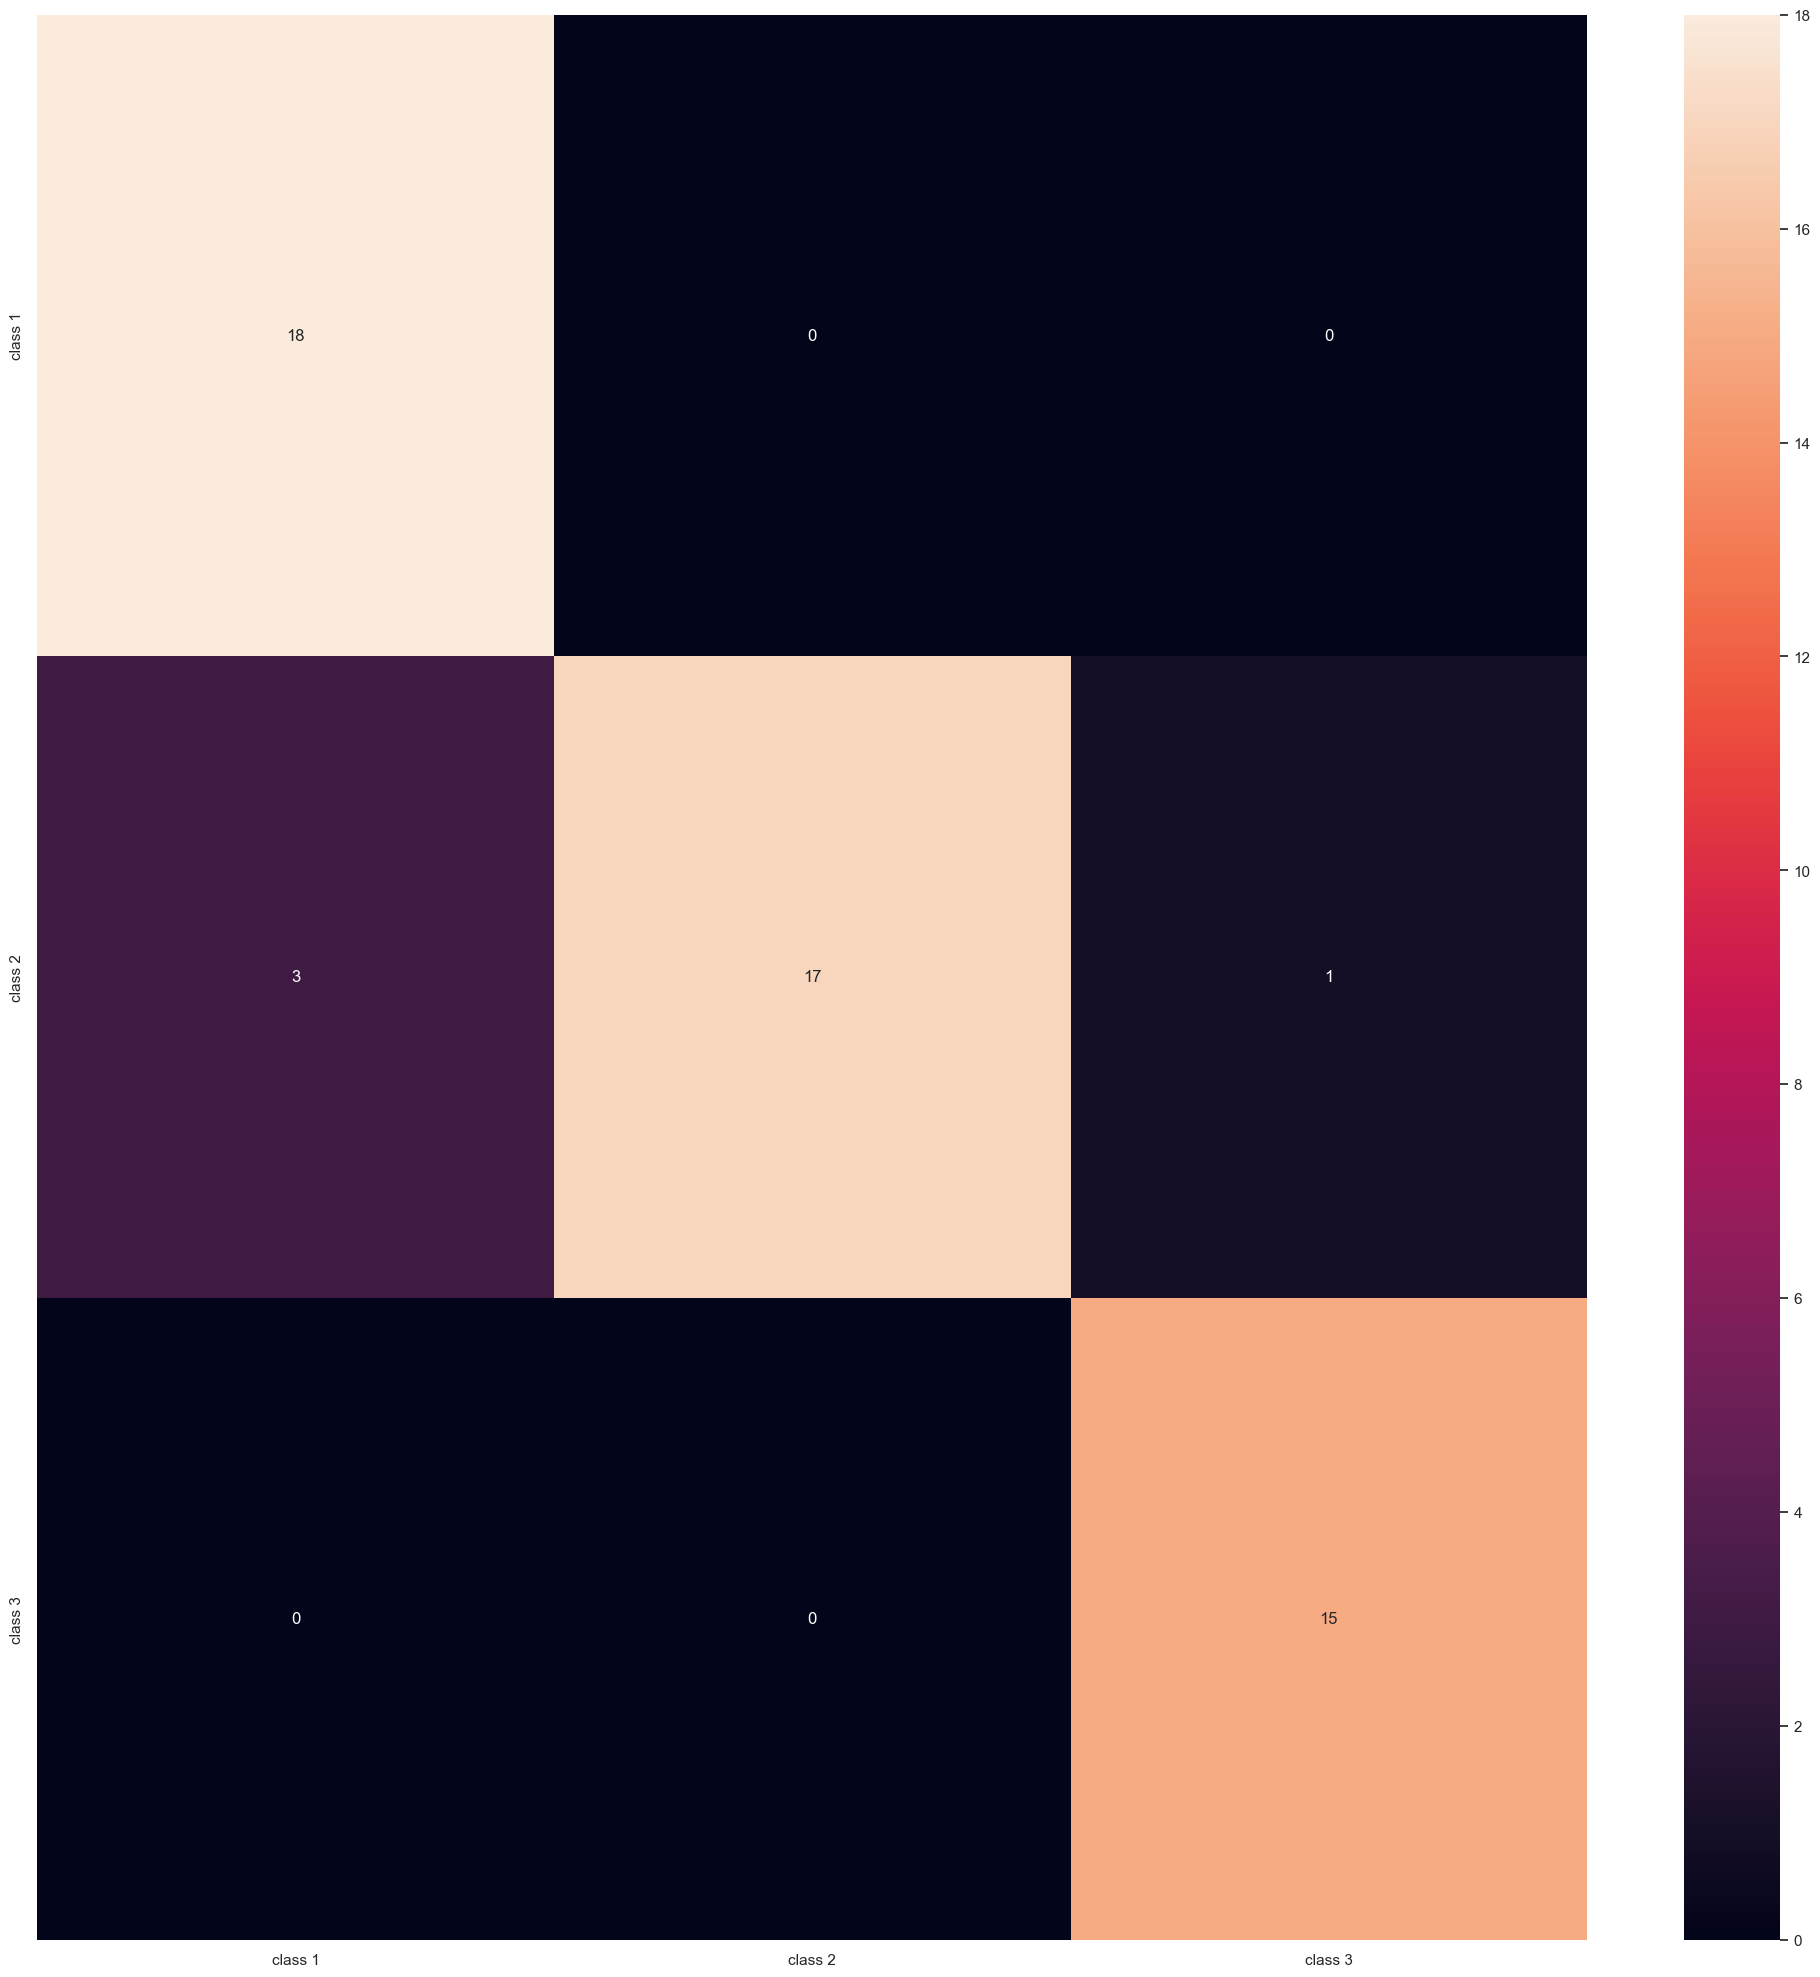

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rfc = pd.DataFrame(y_pred_rfc).copy().astype('float')
y_test = pd.DataFrame(y_test).copy().astype('float')

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_rfc), 
                  columns=classes_names, index = classes_names)



                  
# Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d');


print(classification_report(y_test, y_pred_rfc))

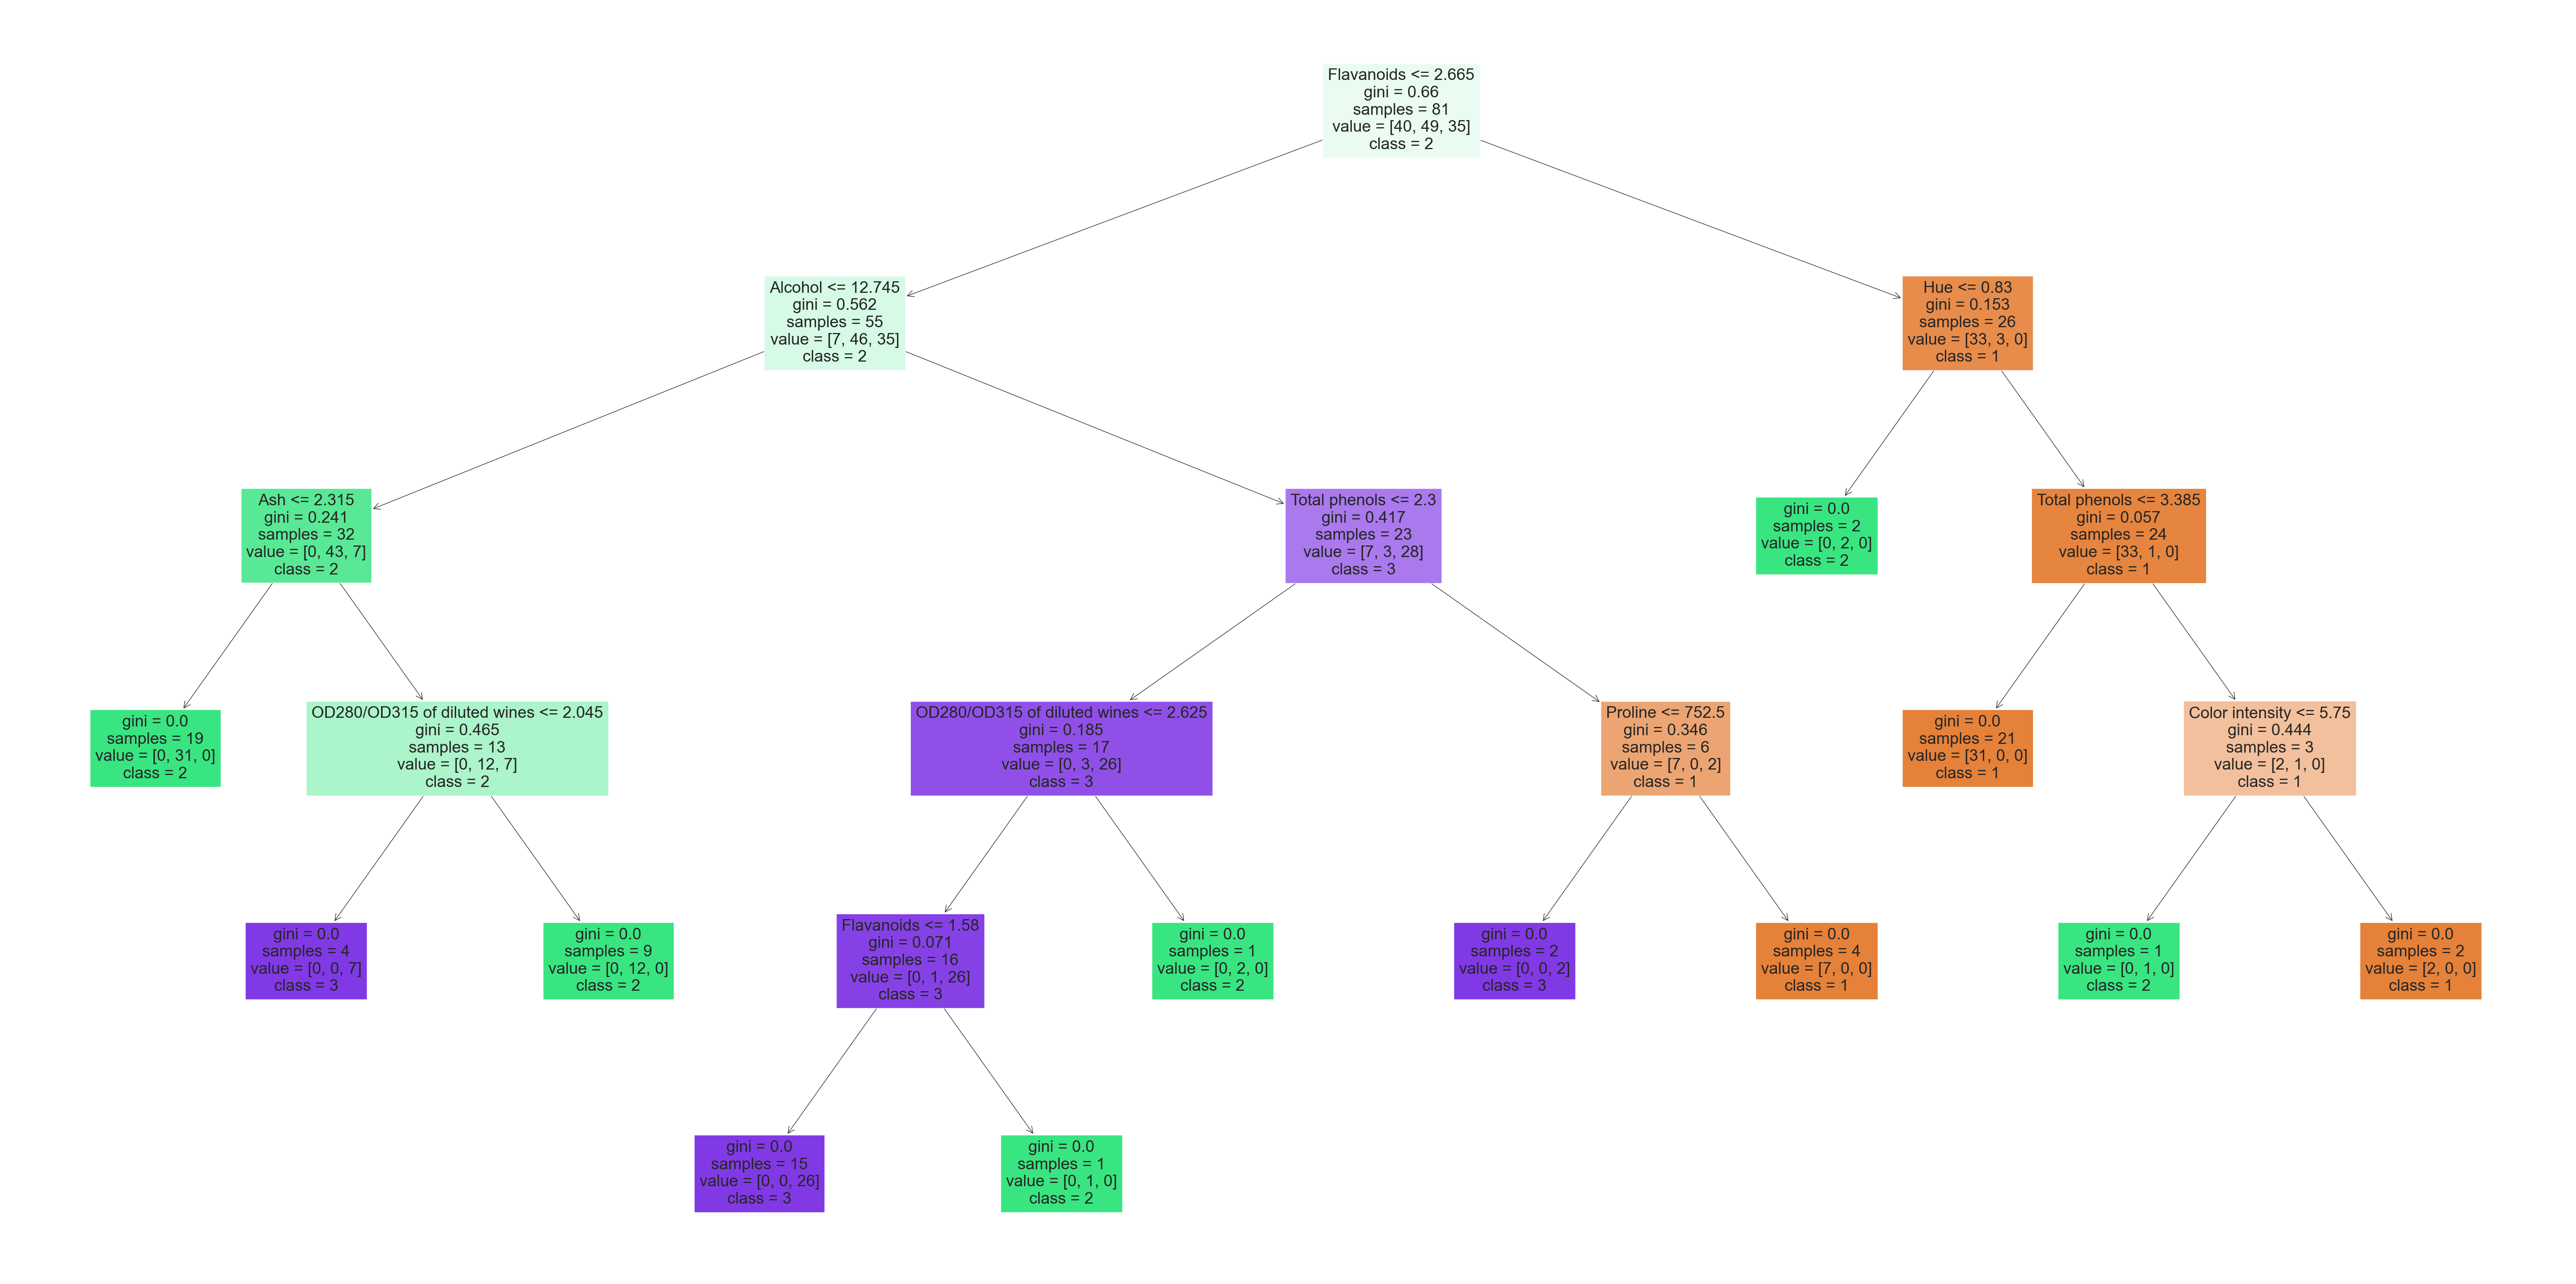

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(best_regressor1.estimators_[3], feature_names = names,class_names=['1', '2','3'],filled=True);

In [95]:
 #feature_importances_

best_regressor1.feature_importances_


array([0.06672157, 0.00616827, 0.00781358, 0.00326746, 0.03396738,
       0.0795031 , 0.24374301, 0.00222559, 0.        , 0.17213805,
       0.16210128, 0.12418479, 0.09816593])

In [96]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": best_regressor1.feature_importances_

})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
6,Flavanoids,0.243743
9,Color intensity,0.172138
10,Hue,0.162101
11,OD280/OD315 of diluted wines,0.124185
12,Proline,0.098166
5,Total phenols,0.079503
0,Alcohol,0.066722
4,Magnesium,0.033967
2,Ash,0.007814
1,Malic acid,0.006168


Flavonoides es la variable más relevante ( 1er nodo del Arbol) a la hora de classificar este dataset en subgrupos.

Si tuvíesemos datos sobre un vino desconocido y quisiésemos confirmar a priori a cual de las 3 clases pertenece nos bastaría con conocer el contenido en Flavonoides, Color intensity, Hue y OD280/OD315 of diluted wines para predecir creíblemente a cual de las 3 cat. corresponde.

De echo este algoritmo se está utilizando para garantizar el origen de algunos vinos que se vendían fraudulentamente como vinos de una cierta D.O

# Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train_dt = X_train_scaled.copy()
X_test_dt = X_test_scaled.copy()


DT_clas = DecisionTreeClassifier(random_state = 42)

In [113]:
DT_clas.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [100]:
# probamos diversos parámetros

param_grid2 = {
    'max_depth': [3, 5, 7, 10, 14],
    'min_samples_split': [2, 5, 10, 12, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 0.7]}

In [105]:
grid_search2 = GridSearchCV(DT_clas, param_grid2, cv=10, scoring='f1_macro')


In [106]:
grid_search2.fit(X_train_dt, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 0.7],
                         'max_depth': [3, 5, 7, 10, 14],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 12, 15]},
             scoring='f1_macro')

In [108]:
print("Mejores parámetros:", grid_search2.best_params_)


Mejores parámetros: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [114]:
# Obtenemos el modelo con los mejores parámetros
best_regressor2 = DecisionTreeClassifier(**grid_search2.best_params_)

# Entrenamos con train
best_regressor2.fit(X_train_dt, y_train)

# Predecimos en el conjunto de test
y_pred_dt = best_regressor2.predict(X_test_dt)

# Evaluamos el rendimiento en  test
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 0.07407407407407407
Coeficiente de Determinación (R^2): 0.8781725888324873


              precision    recall  f1-score   support

         1.0       0.94      0.89      0.91        18
         2.0       0.87      0.95      0.91        21
         3.0       1.00      0.93      0.97        15

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



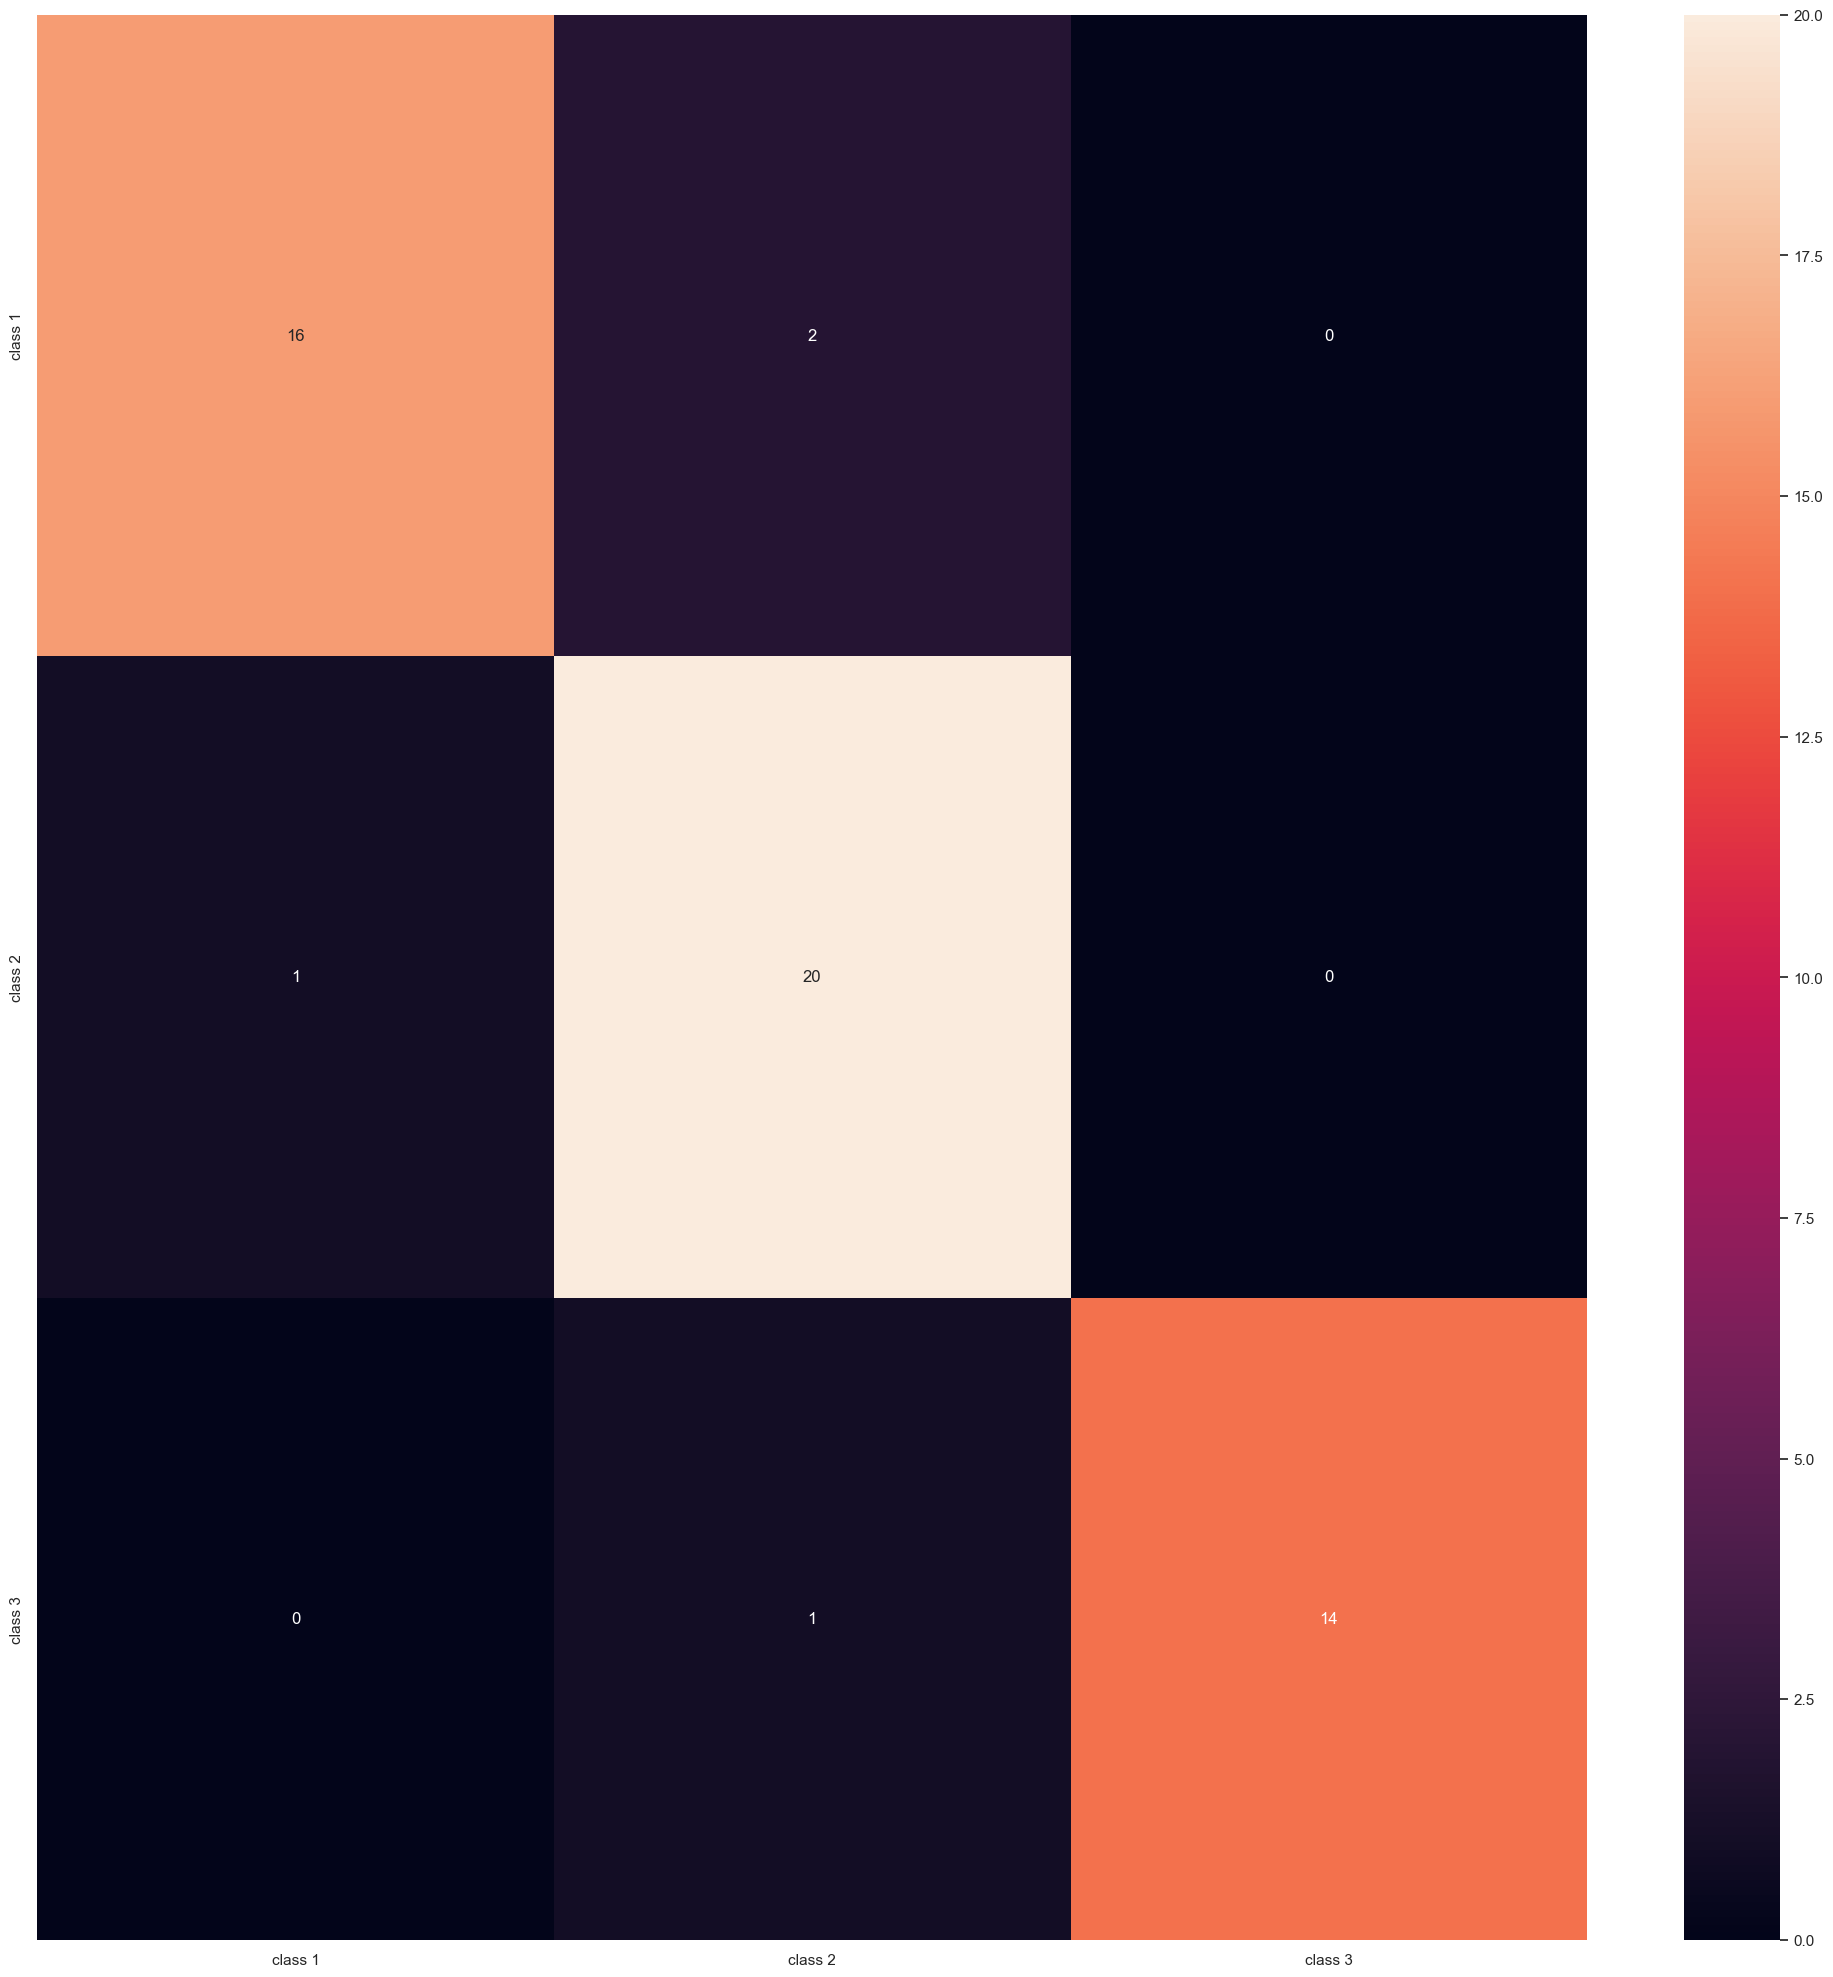

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_dt = pd.DataFrame(y_pred_dt).copy().astype('float')
y_test = pd.DataFrame(y_test).copy().astype('float')

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_dt), 
                  columns=classes_names, index = classes_names)



                  
# Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_dt))

Vemos que para :
    
    Clase 1 : 16 ok y 2 false positive (Clase 2 clasificada como clase 1 )
    Clase 2 : 20 ok y 1 false positive (Clase 1 clasificada como clase 2 )  
    Clase 3 : 14  ok y 1 False positive:(Clase 2 clasificada como clase 3 )

# KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier


clf3 = KNeighborsClassifier()
clf3.get_params()



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [121]:
param_grid3 = {'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': [1,2,3,4,5,6,7],
 'p': [2,3,4],
 'weights': 'uniform'}

In [123]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf3,param_grid3,cv=10, scoring='f1_macro')

clf3.fit(X_train_scaled,y_train)


KNeighborsClassifier()

In [124]:
y_pred_knn = clf3.predict(X_test_scaled)


acc =  clf3.score(X_test_scaled, y_test)  # Accuracy
print(acc)

0.9444444444444444


              precision    recall  f1-score   support

         1.0       0.95      1.00      0.97        18
         2.0       0.91      0.95      0.93        21
         3.0       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



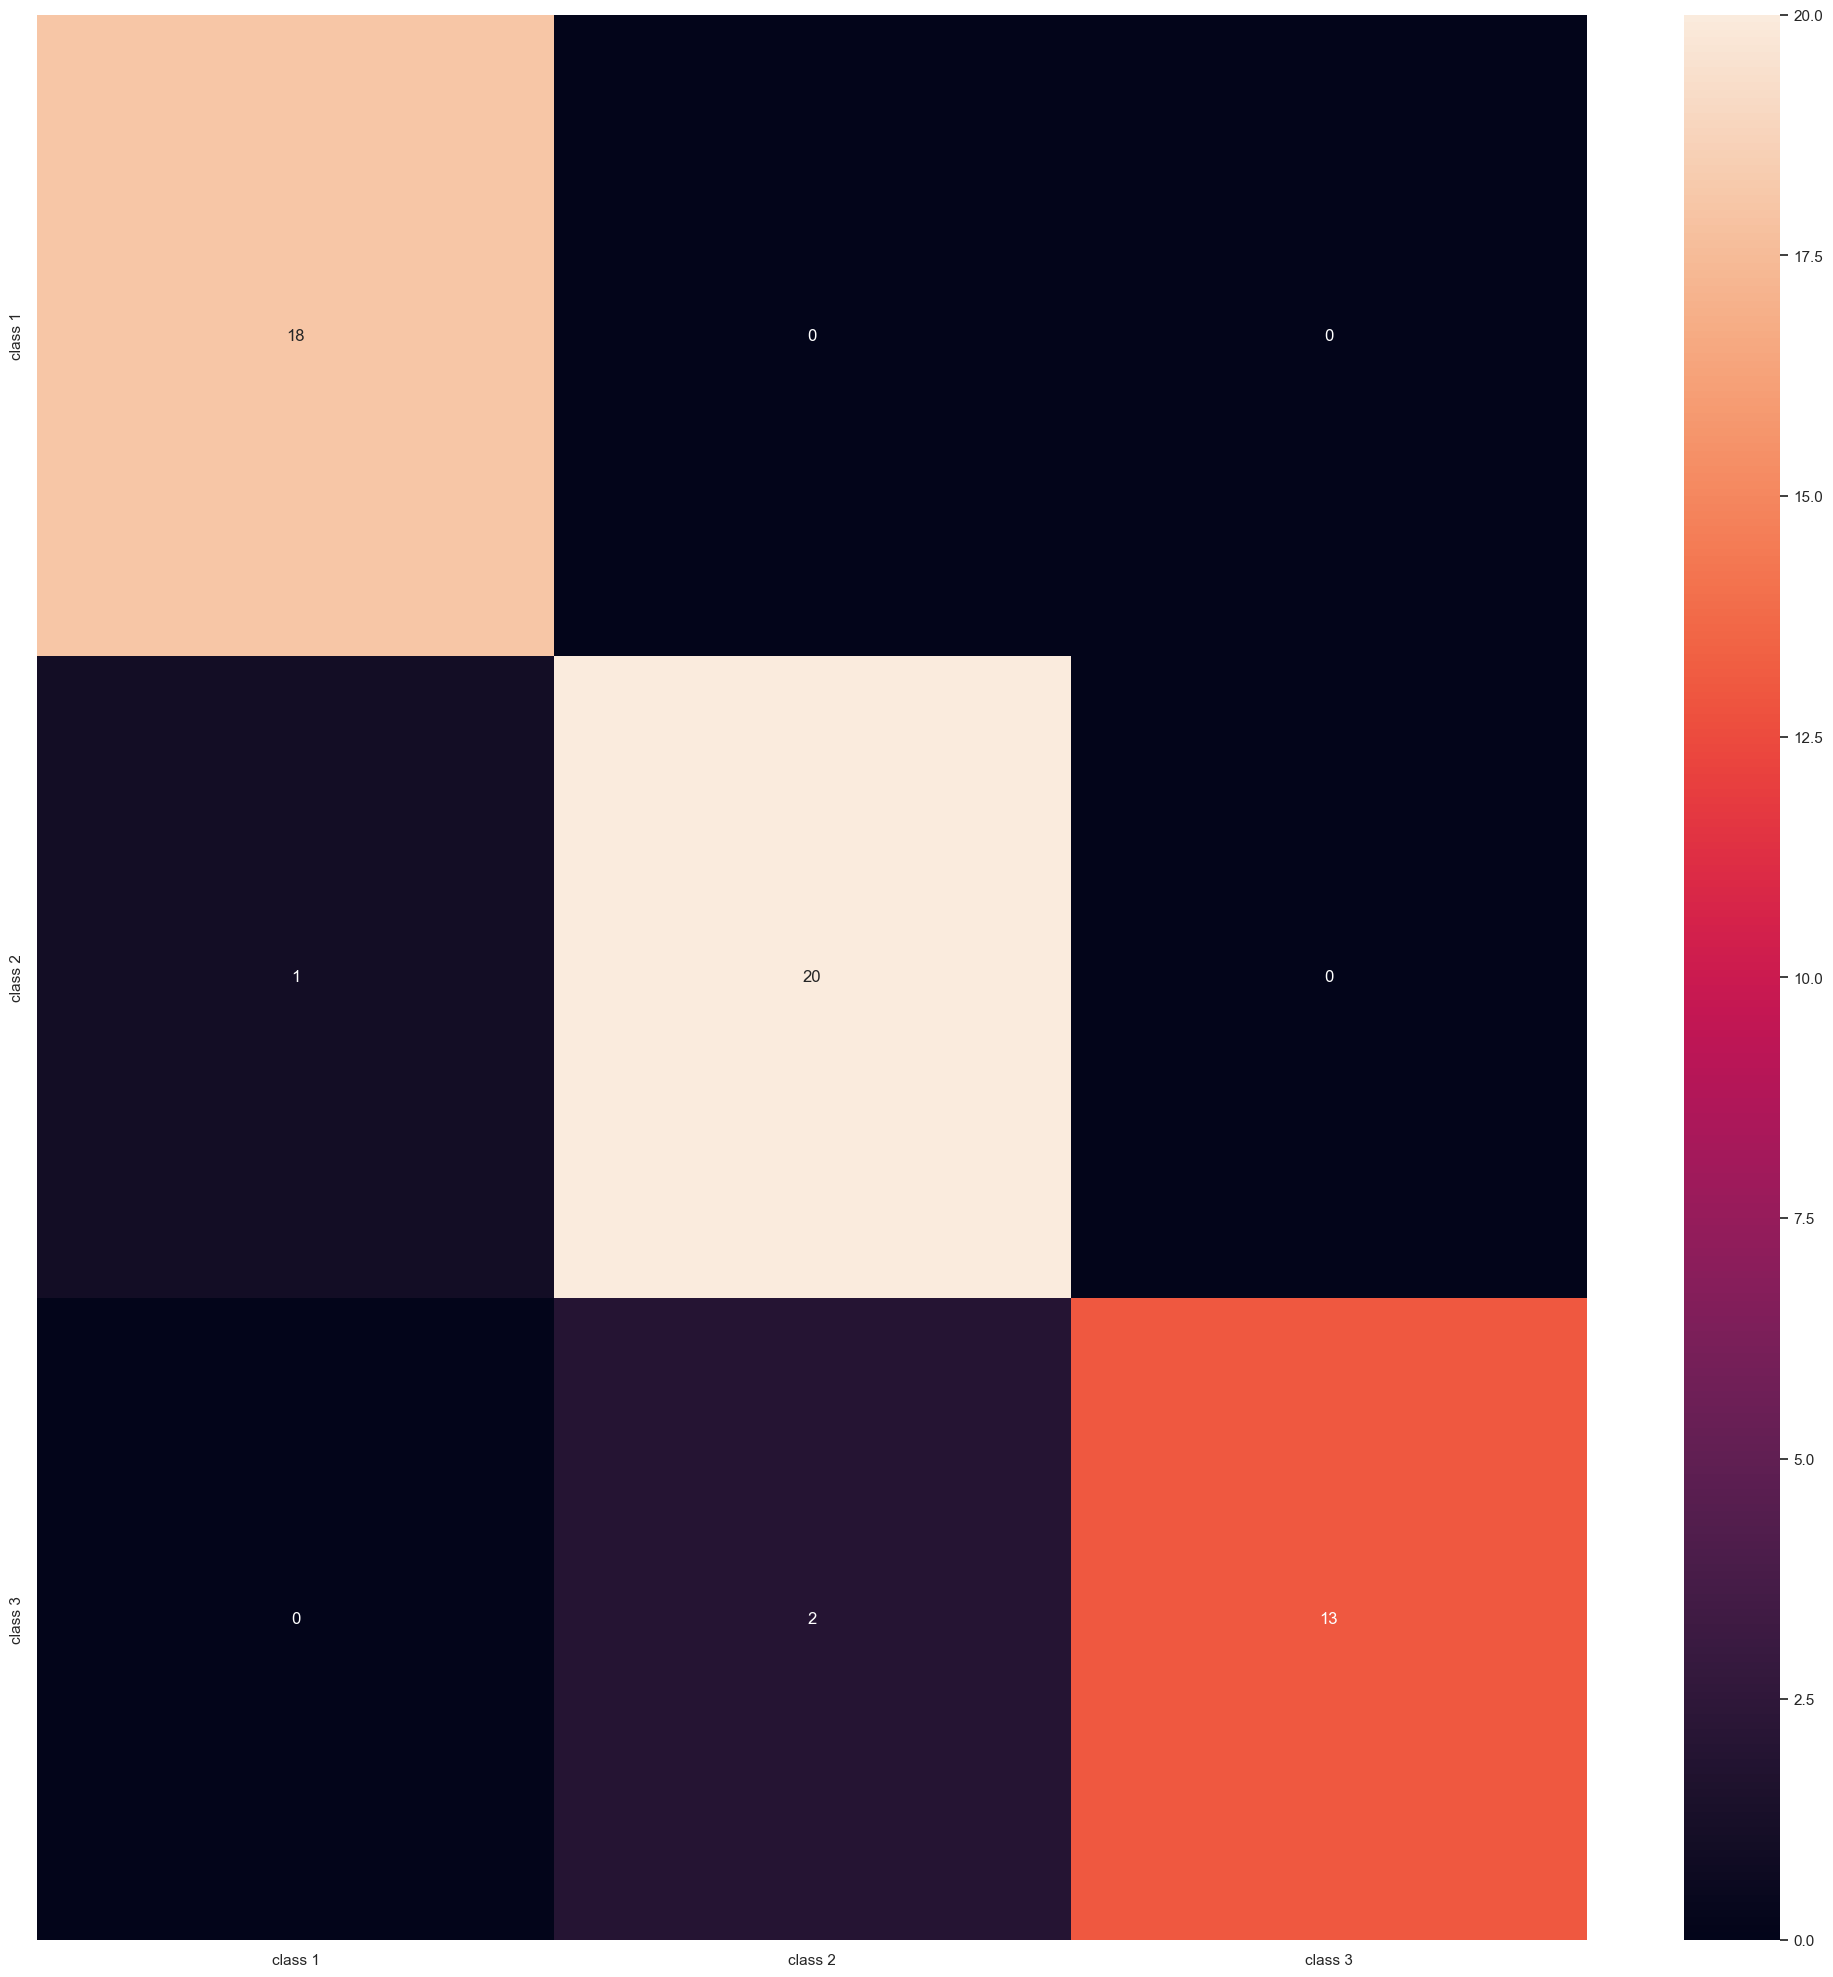

In [125]:
from sklearn.metrics import classification_report, confusion_matrix


# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_knn))

Vemos que para :
    
    Clase 1 : 18 ok 
    Clase 2 : 20 ok y 1 False positive (Clase 1 clasificada como clase 2 )
    Clase 3 : 13  ok y 2 False positive:(Clase 2 clasificada como clase 3 : 2)
                                       
    
    
    Quizás (k = 3 ) 3 clases no sea el mejor criterio. Investiguemos el k óptimo 
    

In [ ]:
# Calculamos  f1 score para K values entre  1 y 20

from sklearn.metrics import f1_score

f1s = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    #  average='weighted' para calcular una media ponderada de las 3 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

# Plot

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

El mejor F1-score es cuando k = 10..vamos a entrenar de nuevo nuestro modelo con K = 10

In [ ]:
clf10 = KNeighborsClassifier(n_neighbors=10)
clf10.fit(X_train_scaled, y_train)
y_pred10 = clf10.predict(X_test_scaled)
print(classification_report(y_test, y_pred10))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred10), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred10))

Teníamos que para :
    
    Clase 1 : 18 ok 
    Clase 2 : 20 ok y 1 False positive (Clase 1 clasificada como clase 2 )
    Clase 3 : 13  ok y 2 False positive:(Clase 2 clasificada como clase 3 : 2)
            
            
                                       
Ahora con k optimizado hemos mejorado en la clase3  pues hemos pasado de 2 False positive a 1 False positive
    
    
    
    
    

In [ ]:
#Si comparamos classification report previo al ajuste de K=10

print(classification_report(y_test, y_pred_knn)),print(classification_report(y_test, y_pred10))


# Comparamos via CValidation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)

In [ ]:
modelos = {
    'knc': knc,
    'dtc' : dtc,
    'rfc' : rfc
}

In [ ]:
from sklearn.model_selection import cross_val_score

models = [ knc, dtc,rfc]
score_mean = []
score_std = []


for model in models:
    pipeline = Pipeline(
        [
            ('preprocessing', RobustScaler()),
            ('model', model)
        ]
    )
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')
    
    score_mean.append(score.mean())
    score_std.append(score.std())
    


In [ ]:
data_y = {} # guardaremos predicciones de cada modelo
metrics = []

for name, model in modelos.items():
    pipeline = Pipeline([
            ('preprocessing', RobustScaler() ),
            ('model', model)
        ])
    pipeline.fit(X_train, y_train)
     
    #almaceno en el diccionario la predicción de cada
    data_y[name] = pipeline.predict(X_test)

    #almaceno las metricas
    metrics.append({
        'Modelo': name,
        'Score': pipeline.score(X_test, y_test)
    })

df_y = pd.DataFrame(data_y)
df_metrics = pd.DataFrame(metrics)    

In [ ]:
df_metrics

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
df_y.plot.kde(ax=ax)
plt.title('KDE para salidas')
plt.xlabel('Valor')
plt.ylabel('Densidad')


In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(data=df_metrics, x = 'Modelo', y = 'Score')
plt.title('Score de los modelos');

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, data_y, 
                  columns=classes_names, index = classes_names)
                  
# Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred10))

# Alana

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Miramos los modelos entrenados con el train y con los parámetros por defecto


In [ ]:
lda = LinearDiscriminantAnalysis()
knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)


In [ ]:
modelos = {
    'lda': lda,
    'knc': knc,
    'gnb' : gnb,
    'dtc' : dtc,
    'svc' : svc,
    'rfc' : rfc
}

In [ ]:
data_y = {} # guardaremos predicciones de cada modelo
metrics = []

for name, model in modelos.items():
    pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('model', model)
        ])
    pipeline.fit(X_train, y_train)
     
    #almaceno en el diccionario la predicción de cada
    data_y[name] = pipeline.predict(X_test)

    #almaceno las metricas
    metrics.append({
        'Modelo': name,
        'Score': pipeline.score(X_test, y_test)
    })

df_y = pd.DataFrame(data_y)
df_metrics = pd.DataFrame(metrics)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
df_y.plot.kde(ax=ax)
plt.title('KDE para salidas')
plt.xlabel('Valor')
plt.ylabel('Densidad')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(data=df_metrics, x = 'Modelo', y = 'Score')
plt.title('Score de los modelos');

Buscando el mejor modelo con parámetros por defecto

In [ ]:
from sklearn.model_selection import cross_val_score

models = [ knc, dtc, rfc]
score_mean = []
score_std = []

for model in models:
    pipeline = Pipeline(
        [
            ('preprocessing', RobustScaler),
            ('model', model)
        ]
    )
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    score_mean.append(score.mean())
    score_std.append(score.std())

In [ ]:
pipeline.fit(X_train1,y_train)


In [ ]:
pipeline.predict(X_test)


In [ ]:
pipeline

In [ ]:
X_train

In [ ]:
X_train = np.asarray(column_trans.fit_transform(X_train))
X_test = np.asarray(column_trans.fit_transform(X_test))
X_test

In [ ]:
names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data1 = pd.DataFrame(data2, columns = names)
data1.head(3)

In [ ]:
X_train.shape

In [ ]:
y_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación R2:", r2)

KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors)

In [ ]:
params = nn.get_params()
print(params)